<a href="https://colab.research.google.com/github/ighslin/audio/blob/main/D2_4_CNN%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98_%E4%BF%AE%E6%AD%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***初探CNN(Convolutional Neural Network)***
CNN譯為「卷積神經網絡」，是近代深度學習應用於電腦視覺的技術，CNN造成了電腦視覺領域飛躍性的成長。
<br/>
卷積神經網絡的概念，是透過AI自動學習製作最好的Kernel(卷積)，但是卷積神經網絡的層數相當地深，其可以捕捉的形體遠比傳統神為設計的Kernel更能辨識複雜的形體，也因此目前的圖像辨識技術當中，有很大的比重都是CNN為基底。

<img src='https://chtseng.wordpress.com/wp-content/uploads/2017/09/4293_jd_lv-5awa.png'>

## ***圖像化理解CNN的概念***

#### ***Kernel is the Learnable!***
傳統電腦視覺的十多大部分放在「設計有用的卷積核心」，藉此偵測圖片當中的形體。針對任何圖片分類任務，都需要花費大量的時間來設計與驗證卷積核心。而卷積神經網絡的概念，則是透過一些數學原理設計的演算法，***讓電腦看過大量的圖片資料以後，能夠自行學習並且設計出「設計有用的卷積核心」，而無須人的介入。***

由於近年來的科技發展快速，電腦硬體的運算力相對於過去大幅增加，讓卷積神經網絡可以在短時間內就學習、設計出強大的***卷積核心***，是人為方式無法比擬的效率。

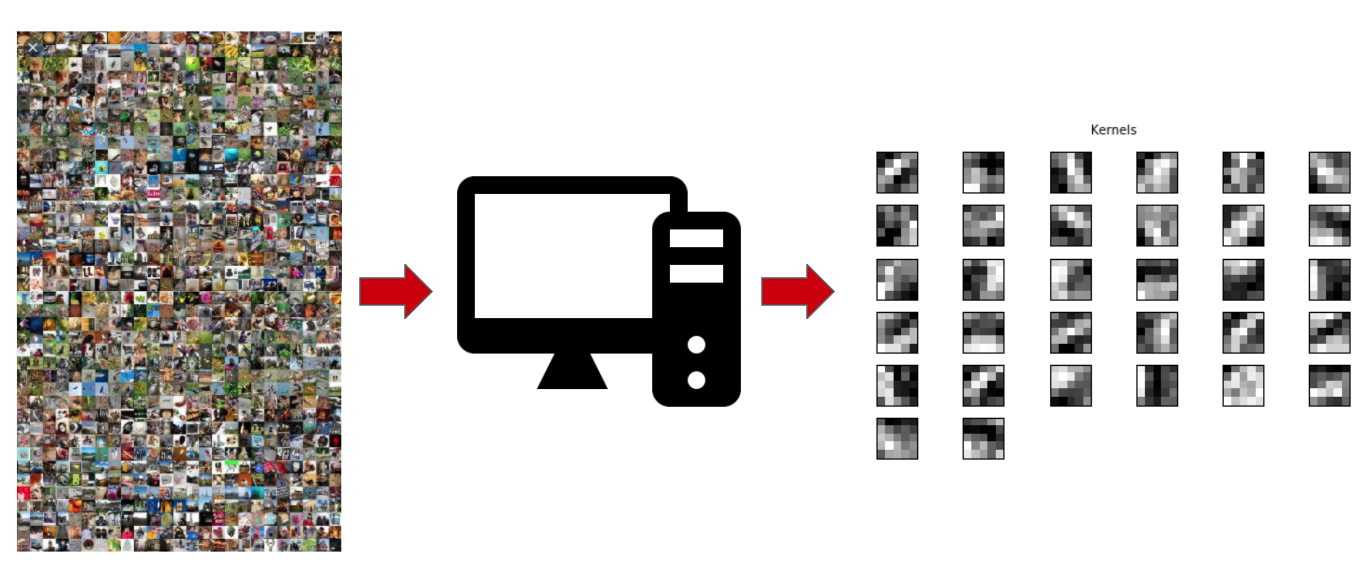

## ***CNN簡介***
將透過以下的優良資源，建立學員對CNN的初步認識。CNN是什麼、可以做什麼、怎麼運作的，在此簡介過後，您將會完全明白。準備好學習這個強大的技術吧！

* [CNN運作原理](https://www.youtube.com/watch?app=desktop&v=f0t-OCG79-U&ab_channel=IsraelVicars)
* [CNN都偵測到了圖片中的什麼形體？](https://www.youtube.com/watch?v=AgkfIQ4IGaM&ab_channel=JasonYosinski)
* [基本概念到模型建構與訓練](https://ithelp.ithome.com.tw/articles/10326669)
* [動手體驗CNN](https://cs.stanford.edu/people/karpathy/convnetjs/demo/mnist.html)

## ***自己打造一個CNN圖片分類器***
在了解過CNN的概念以後，何不自己動手打造一個呢？在此範例，我們將會帶大家建立自己的CNN數字圖片分類器，在經歷過此練習案例，您將打造出一個模型，可以對輸入的數字圖片判別樹於什麼樣的數字。

我們將學習以下：
* 讀取scikit內建的手寫數字資料集
* 使用Keras套件建立CNN網絡
* 訓練CNN網絡
* 使用訓練完的模型進行預測
* 評量模型表現


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

from keras import Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## ***讀取手寫數字圖片資料***
* 在scikit-learn套件當中，已經內建了手寫數字圖片資料，透過***datasets.mnist.load_data()***函式，我們可以獲得全部的數字圖片資料。
* 讀取出來的圖片資料分為***「訓練用」***以及***「測試用」***，訓練資料是提供給CNN學習設計有用的卷積核心，測試資料則是在評量CNN模型學習的狀況優劣

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### ***手寫數字圖片一覽***
* 透過matplotlib套件，我們首先瀏覽手寫數字的樣貌，在此先畫出圖片當中前10張圖片

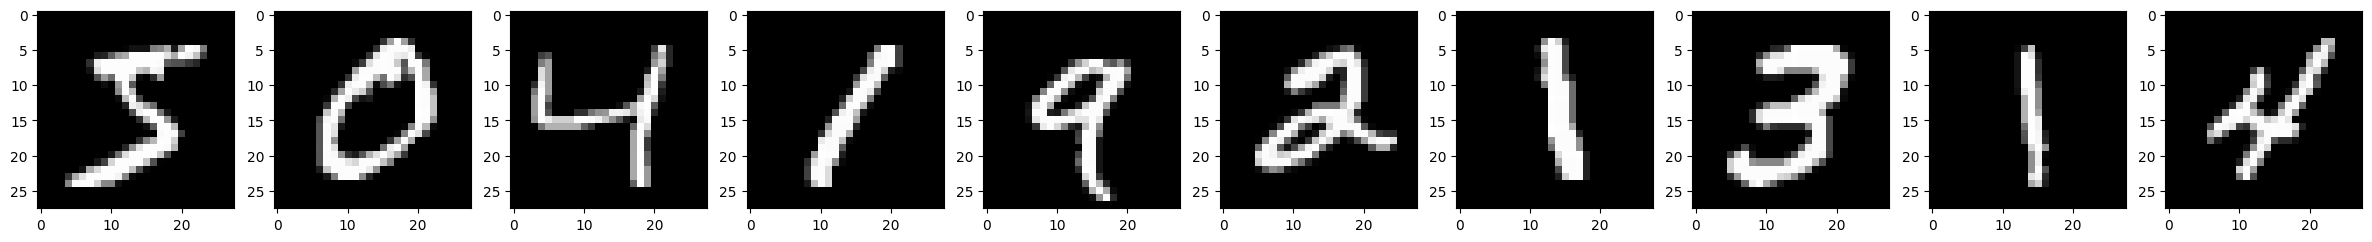

In [ ]:
n_image = 10 #前N筆要顯示的資料
_, axes = plt.subplots(1, n_image, figsize=(30, 3))
#將圖片資料當中，前N筆資料一一畫出
for i in range(n_image):
  axes[i].imshow(x_train[i], cmap='gray')

#### ***圖片資料維度一覽***
* 回顧數位圖片的儲存格式，是將數字存放在格子當中代表顏色，在此我們將圖片的格式也印出，觀察圖片資料的維度

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape, 'image shape')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
(28, 28) image shape


#### ***圖片標籤一覽***
* 手寫數字當中共有0-9共10個數字，每一個數字類型我們用一個整數來代表他的「標籤」

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### ***圖片、標籤之對應***
* 共有10種標籤種類，0-9對應到手寫數字圖片的0-9

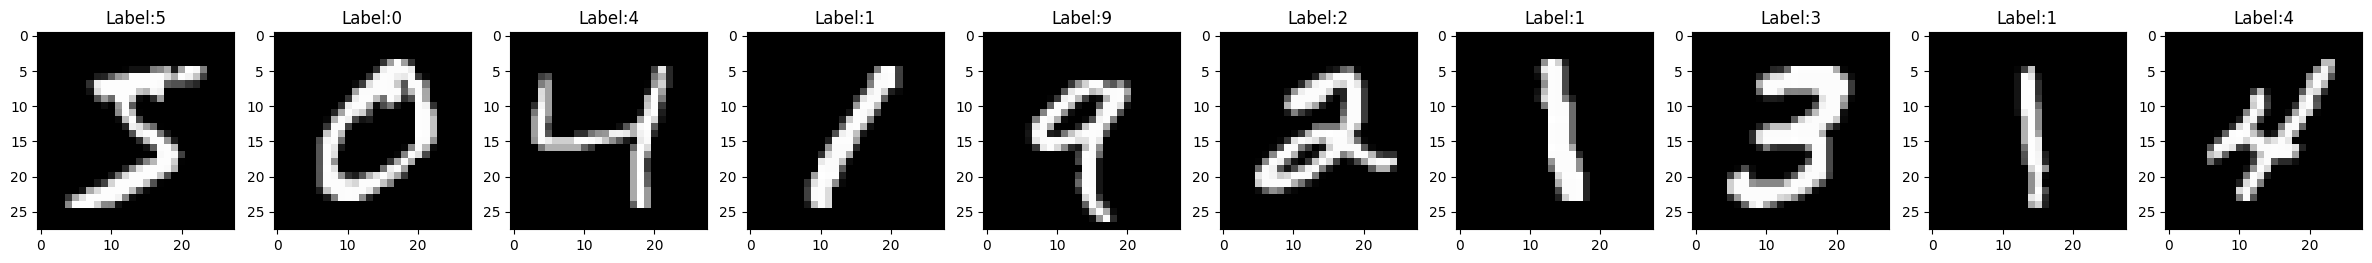

In [ ]:
n_image = 10 #前N筆要顯示的資料
_, axes = plt.subplots(1, n_image, figsize=(30, 3))
#將圖片資料當中，前N筆資料一一畫出
for i in range(n_image):
  axes[i].set_title("Label:{}".format(y_train[i]))
  axes[i].imshow(x_train[i], cmap='gray')

## ***資料處理***
在進行模型訓練之前，資料通常需要處理成特定的格式，才能夠讓CNN開始訓練，以下針對圖片的處理分為：
* 圖片前處理
* 標籤前處理

#### ***標籤預處理***
* 原本的標籤格式是整數表示，需要透過特殊處理轉換成CNN可以接受的格式。此轉換方式稱為「One-hot encoding」
* 「One-hot encoding」的轉換結果可以看成是「機率」，每一個格子內的數字代表一個類別的機率
* CNN模型接收一張輸入圖片，輸出N個數字，代表圖片屬於某種類別的機率

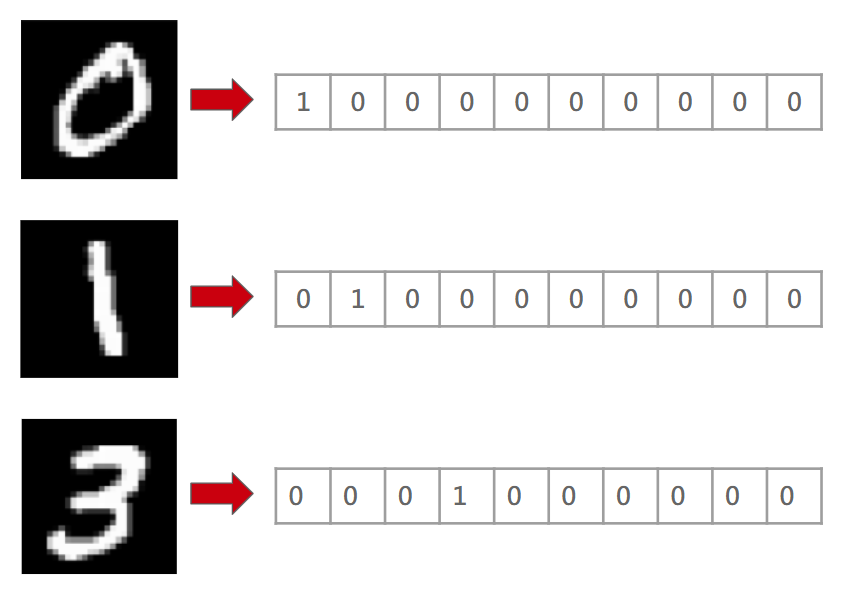

In [ ]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

#### ***圖片預處理***
* 圖片的維度將轉換，(60000,28,28) -> (60000,28,28,1)，這是CNN訓練之前必須要改變的
* 所有圖片的像素原本介於0-255之間，透過將所有像素都除以255可以把像素值壓縮在0-1之間，此作法在模型訓練時可以較為穩定，這樣的過程稱為正規化

In [ ]:
# Add a new axis
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]
# Data normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## ***模型建立***

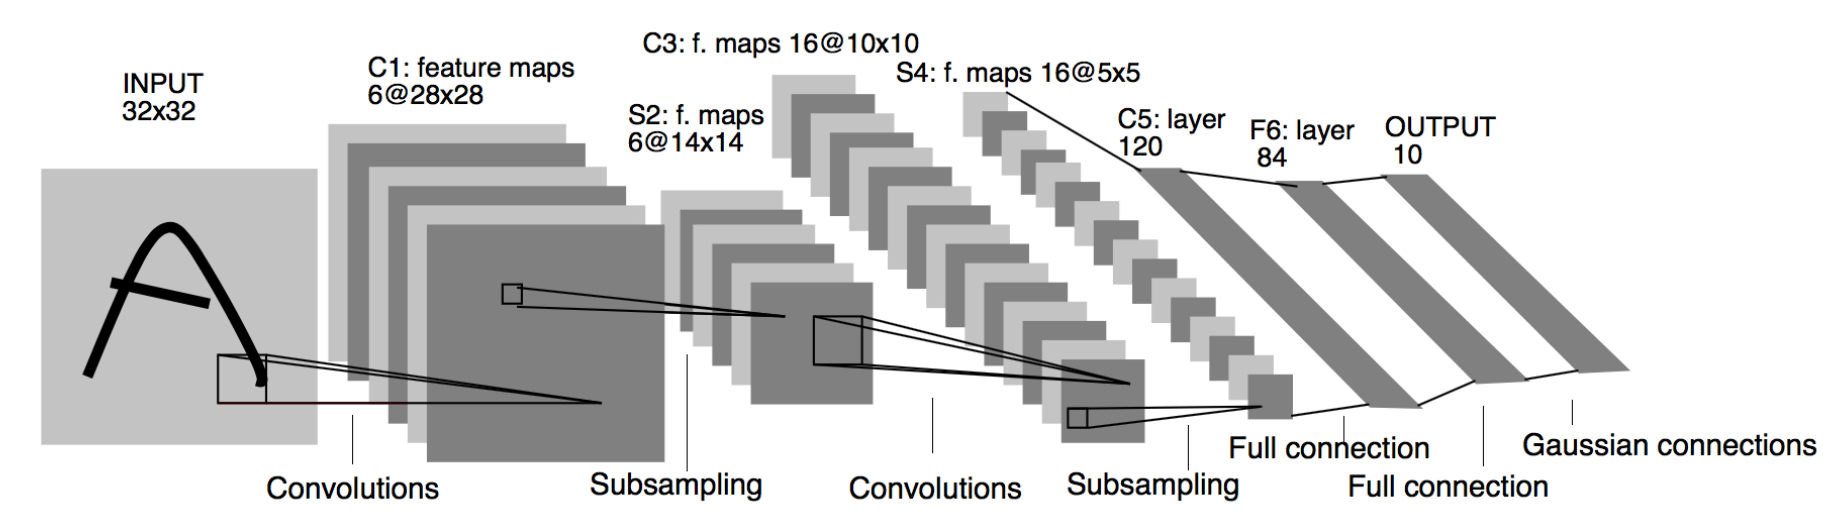

***使用Model.add來建立模型架構***
在keras當中要建立模型的方式相當簡單，只需要以下步驟即可達成：
* 首先建立一個空模型，透過***model = Sequential()***即可
* 使用***model.add()***開始一步步擴增模型的架構

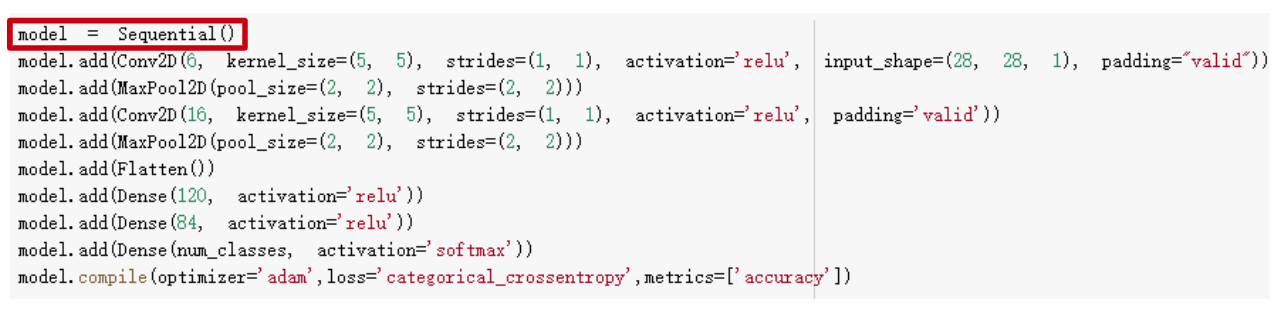

#### ***1.建立卷積層的方式***
透過kerae的API，我們僅需要使用Conv2D便可以用參數創建出一整個卷積層，以下是重要的參數設定，以下圖為例：
* 第1個輸入***6***，代表創建的卷積層要有***6個Kernel***
* kernel_size代表每個kernel的大小，在此案例當中為***5X5***
* input_shape代表輸入圖片的尺寸，但是input_shape只需要在圖片輸入的第一層定義


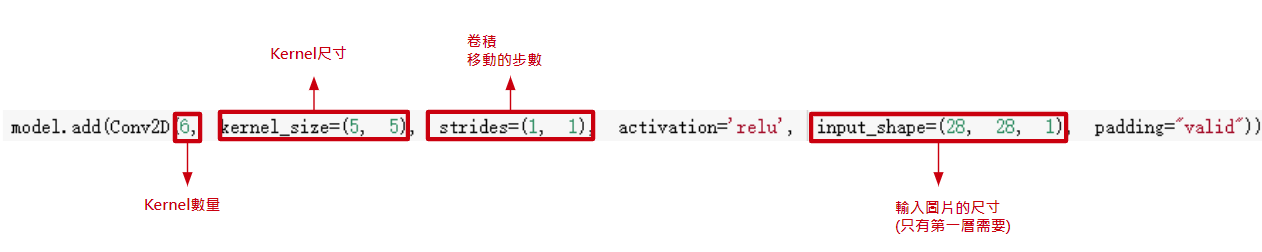

#### ***第一層卷積層***

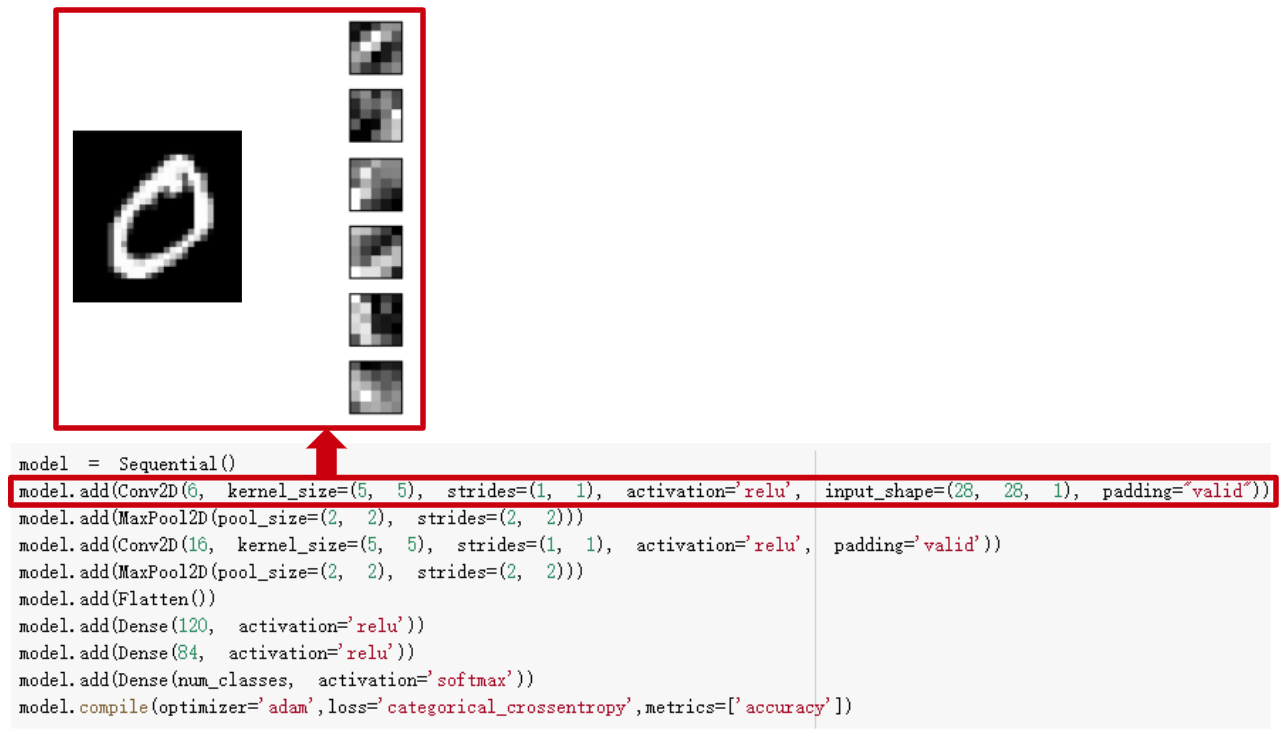

#### ***第二層卷積層***

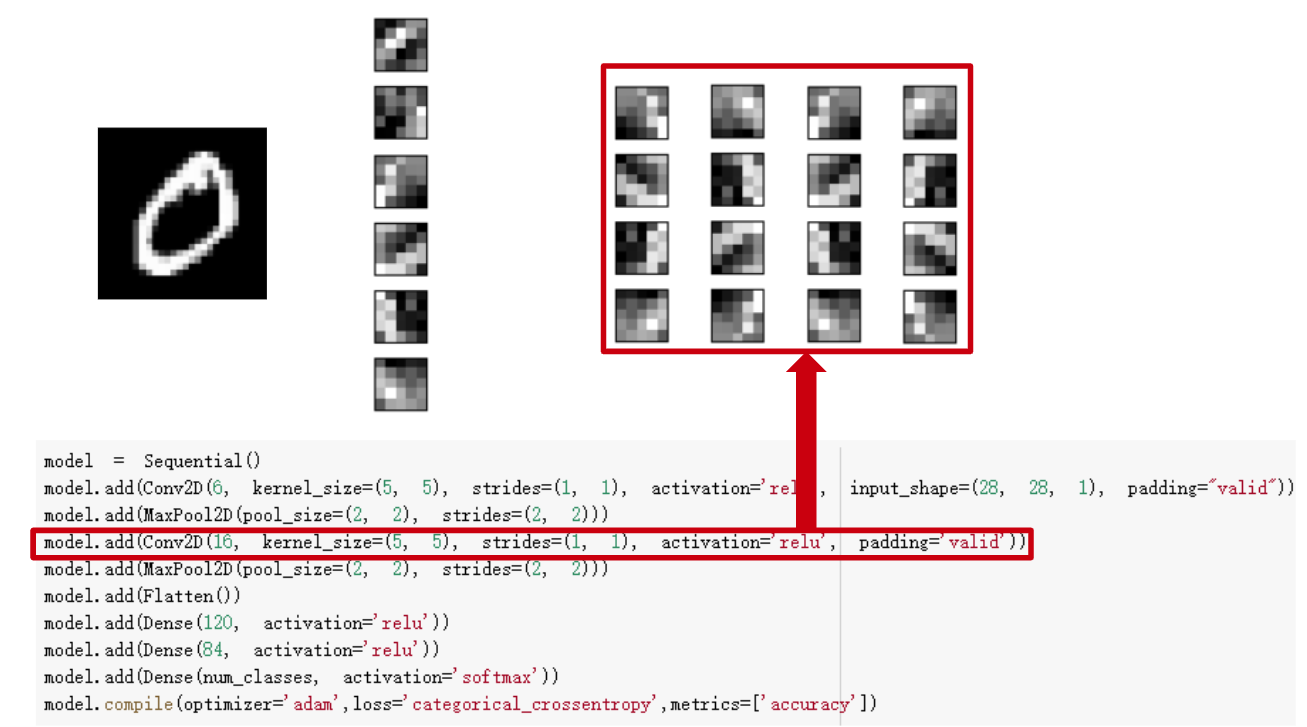

In [ ]:
model = Sequential() #創造一個空模型
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1), padding="valid")) #創造一層卷積層
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2))) #創造池化層
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid')) #創造二層卷積層
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2))) #創造池化層
model.add(Flatten()) #將矩陣打為平坦數列
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
n_epochs = 5
batch_size = 32
result = model.fit(x_train,
           y_train,
           epochs=n_epochs,
           batch_size=batch_size,
           validation_data=(x_test, y_test)
           )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8779 - loss: 0.4070 - val_accuracy: 0.9772 - val_loss: 0.0740
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9800 - loss: 0.0639 - val_accuracy: 0.9809 - val_loss: 0.0607
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9849 - loss: 0.0476 - val_accuracy: 0.9888 - val_loss: 0.0351
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9876 - loss: 0.0371 - val_accuracy: 0.9889 - val_loss: 0.0358
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9903 - loss: 0.0302 - val_accuracy: 0.9859 - val_loss: 0.0469


## ***模型訓練結果一覽***

#### ***觀察模型表現之演進***
* 隨著訓練次數的增多，我們可以觀察每一次訓練完以後，模型的「準確度」與「犯錯程度」，來得知模型是越來越好或是越來越差
* 我們期望模型的表現是越來越好，但同時也必須考慮模型在測試資料上的表現


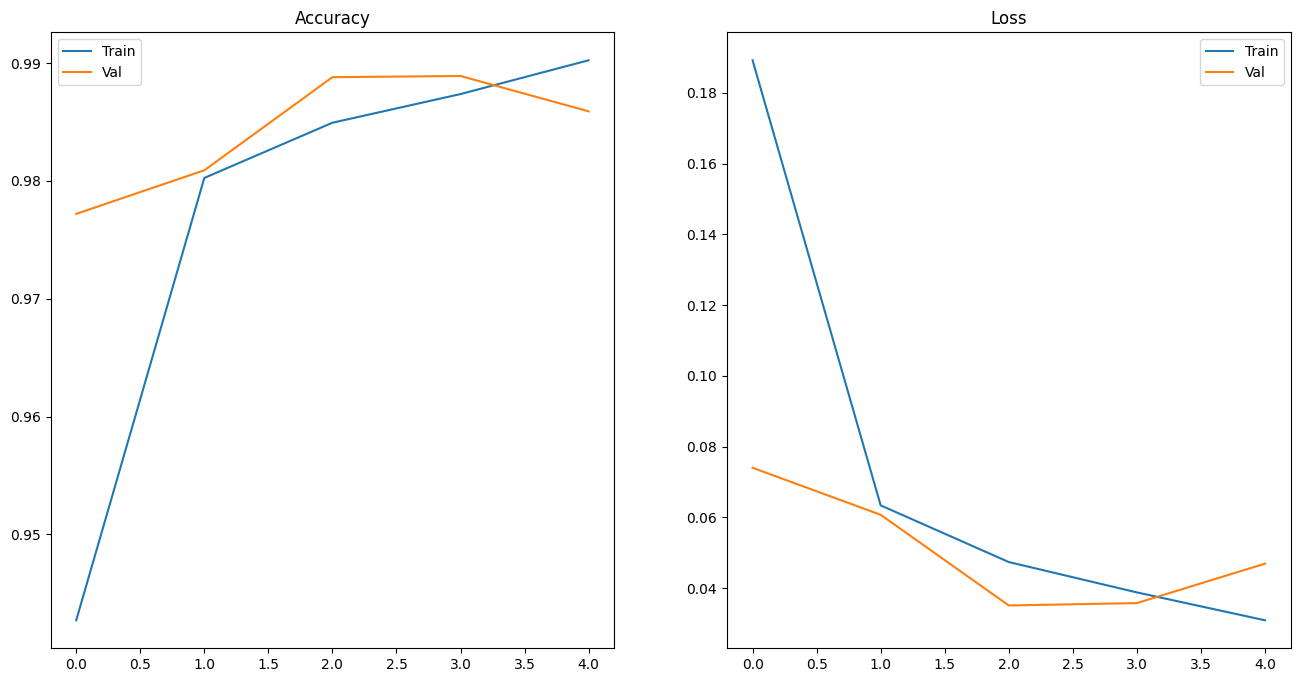

In [ ]:
training_accuracy, val_accuracy = result.history['accuracy'], result.history['val_accuracy']
training_loss, val_loss = result.history['loss'], result.history['val_loss']

_, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].set_title('Accuracy')
axes[0].plot(training_accuracy, label='Train')
axes[0].plot(val_accuracy, label='Val')
axes[0].legend();

axes[1].set_title('Loss')
axes[1].plot(training_loss, label='Train')
axes[1].plot(val_loss, label='Val')
axes[1].legend();

## ***使用訓練完之模型進行預測***
* 第1行程式碼：訓練完的模型，可以使用其***model.predict_classes***方法，針對輸入的圖片進行預測圖片的類別，結果則是一個代表類別的整數


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
模型預測此輸入圖片應為：類別7


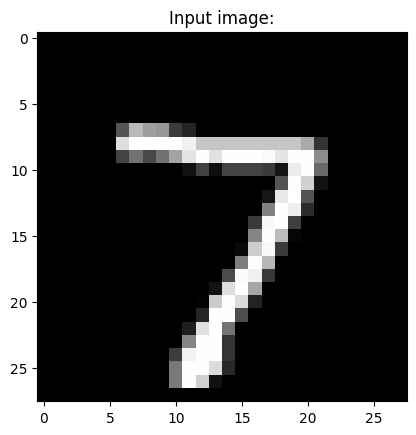

In [ ]:
test_pred = model.predict(x_test[0:1])
test_pred = np.argmax(test_pred, axis=1)
plt.title('Input image:');plt.imshow(x_test[0,:,:,0], cmap='gray');
print('模型預測此輸入圖片應為：類別{}'.format(test_pred[0]))

#### ***模型常把哪一些圖片弄混？***
通常模型需要經過一再訓練，每次訓練都要分析模型之所以表現不好的原因，以改進流程優化模型之表現。通過混淆矩陣，我們能夠很快的觀察模型的表現，以及模型犯錯的情形。

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
np.argmax(y_test, axis=1)

array([7, 2, 1, ..., 4, 5, 6])

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


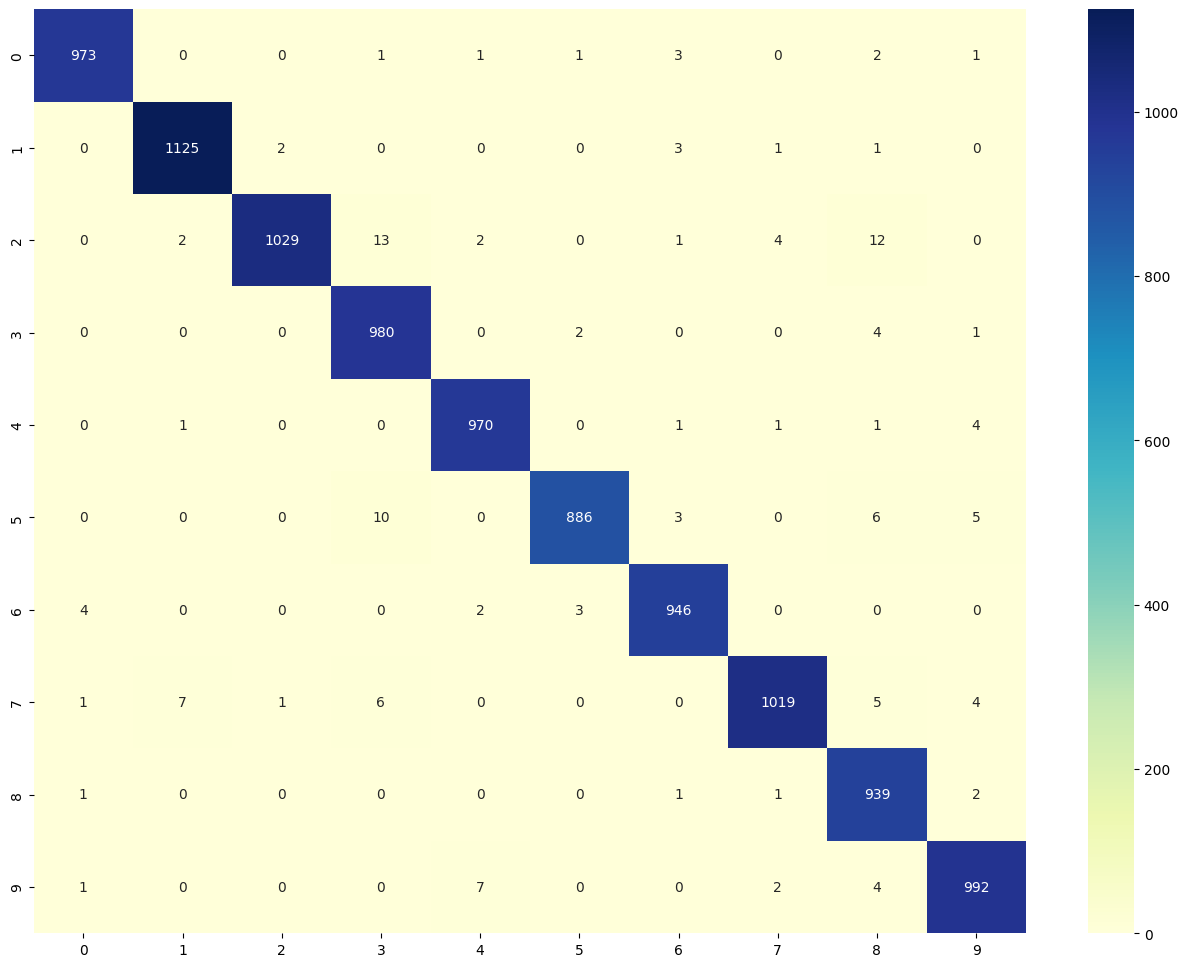

In [ ]:
pred = model.predict(x_test, batch_size=64)
pred = np.argmax(pred, axis=1)
c_matrix = confusion_matrix(pred, np.argmax(y_test, axis=1))
plt.figure(figsize=(16, 12));sns.heatmap(c_matrix, annot=True, fmt="d", cmap="YlGnBu");

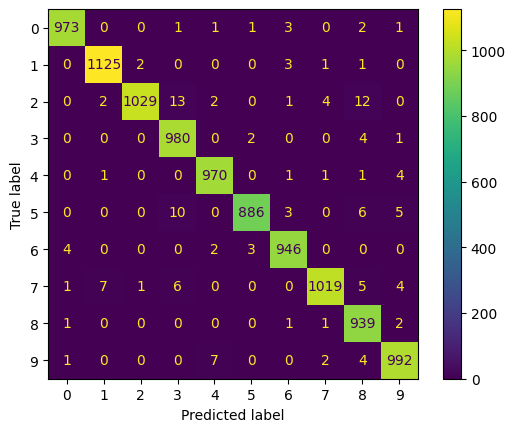

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 使用 ConfusionMatrixDisplay 來繪製混淆矩陣
co_matrix = confusion_matrix(np.argmax(y_test, axis=1),pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()

# 顯示圖表
plt.show()

In [ ]:
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6]])

# 返回扁平陣列中最大值的索引
max_index = np.argmax(a)
print("扁平陣列中最大值的索引：", max_index)

# 返回沿軸 0 的最大值的索引
max_index_axis0 = np.argmax(a, axis=0)
print("沿軸 0 的最大值的索引：", max_index_axis0)

# 返回沿軸 1 的最大值的索引
max_index_axis1 = np.argmax(a, axis=1)
print("沿軸 1 的最大值的索引：", max_index_axis1)

扁平陣列中最大值的索引： 5
沿軸 0 的最大值的索引： [1 1 1]
沿軸 1 的最大值的索引： [2 2]


## ***QUIZ:動手打造自己的數字圖片CNN模型***
請試著用Keras，打造一個數字分類模型，並且使用混淆矩陣觀察模型的表現：
* 首先想好您的模型要有幾層?
* 每一層需要多少Kernel?
*

In [ ]:
model = Sequential() #創造一個空模型
## TODO 請在此調整參數，定義好您的卷積層


model.add(Flatten()) #將
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
n_epochs = 5
batch_size = 32
result = model.fit(x_train,
           y_train,
           epochs=n_epochs,
           batch_size=batch_size,
           validation_data=(x_test, y_test)
           )

In [ ]:
training_accuracy, val_accuracy = result.history['accuracy'], result.history['val_accuracy']
training_loss, val_loss = result.history['loss'], result.history['val_loss']

_, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].set_title('Accuracy')
axes[0].plot(training_accuracy, label='Train')
axes[0].plot(val_accuracy, label='Val')
axes[0].legend();

axes[1].set_title('Loss')
axes[1].plot(training_loss, label='Train')
axes[1].plot(val_loss, label='Val')
axes[1].legend();

In [ ]:
pred = np.argmax(model.predict(x_test, batch_size=64), axis = 1)
c_matrix = confusion_matrix(pred, np.argmax(y_test, axis=1))
plt.figure(figsize=(20, 15));sns.heatmap(c_matrix, annot=True, fmt="d", cmap="YlGnBu");

In [ ]:
test_pred = np.argmax(model.predict(x_test[0:1]), axis = 1)
plt.title('Input image:');plt.imshow(x_test[0,:,:,0], cmap='gray');
print('模型預測此輸入圖片應為：類別{}'.format(test_pred[0]))